# SOURCE: Master math by coding in Python
## SECTION: Critical Points 

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL

Leveraging the video lessons on python and math to gather a refresher on Calculus

In [4]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

## SECTION: Critical Points

The points where the derivative of a function crosses 0 / approaches inf (is undefinited)


In [3]:
x = sym.symbols('x')

fx = -x**4 + 3*x**2

print("The critical points are where this equation equals 0")
sym.diff(fx)

The critical points are where this equation equals 0


-4*x**3 + 6*x

The critical points are [-1.  1.] [0.]


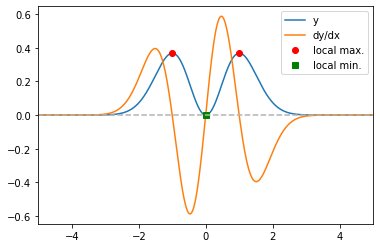

In [11]:
#  Empirical method
# this needs to be an odd number of steps
# create a function
x = np.linspace(-5,5,1001) # vs 1001
fx = x**2 * np.exp(-x**2)

# extrema
localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]
print('The critical points are ' + str(x[localmax]) + ' ' + str(x[localmin]))

# compute its derivative
dfx = np.diff(fx)/np.mean(np.diff(x)) # scale by dx!

# plot everything
plt.plot(x,fx,label='y')
plt.plot(x[0:-1],dfx,label='dy/dx')
plt.plot(x[localmax],fx[localmax],'ro',label='local max.')
plt.plot(x[localmin],fx[localmin],'gs',label='local min.')
plt.plot(x[[0,-1]],[0,0],'--',c=[.7,.7,.7])

plt.legend()
plt.xlim(x[[0,-1]])
plt.show()

plt.show()

In [12]:
# Symbolic way of solving these variables
x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)
fx


x**2*exp(-x**2)

In [13]:
dfx = sym.diff(fx)
c_points = sym.solve(dfx)
c_points

[-1, 0, 1]

## Exercise

Plot a horrible looking equation and it's values in the set {0 - 2} in steps of .25


In [15]:
# what values of 'a' give this function a critical point at x=1 or x=2?
a,x = sym.symbols('a,x')

baseexpr = x**2 * sym.exp(-a*x**2)
baseexpr

x**2*exp(-a*x**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

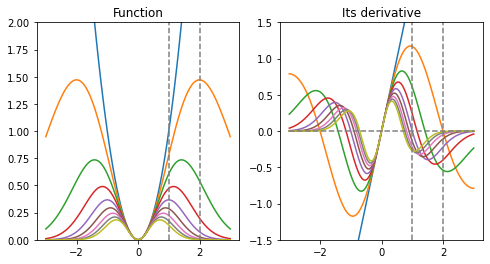

In [18]:
# Setting up of the range of the number set and the x range
arange = np.arange(0,2.25,.25)
xrange = np.linspace(-3,3,100)

# setup plots
fig,ax = plt.subplots(1,2)

# Looping over the a range
for ai in arange:
    # sub in the values of ai for the a in the expression
    fx = baseexpr.subs(a,ai)
    # create the derivative of the fx equation with the value plugged in
    dfx = sym.diff(fx)
    # find the critical points
    c_points = sym.solve(dfx)

    # print(c_points)
    # Create a plot

    ax[0].plot(xrange, sym.lambdify(x,fx)(xrange))
    ax[1].plot(xrange, sym.lambdify(x,dfx)(xrange))

    if 1 in c_points:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=1! Woohoo!!}' %sym.latex(fx)))
    elif 2 in c_points:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=2! Woohoo!!}' %sym.latex(fx)))
    else:
        display(Math('\\quad %s\\text{ has NO critical point at x=2. :(}' %sym.latex(fx)))

# some adjustments to the function plot
ax[0].set_ylim([0,2])
ax[0].set_title('Function')
ax[0].plot([1,1],[0,2],'--',c='gray')
ax[0].plot([2,2],[0,2],'--',c='gray')

# adjustments to the derivative plot
ax[1].set_ylim([-1.5,1.5])
ax[1].plot(xrange[[0,-1]],[0,0],'--',c='gray')
ax[1].plot([1,1],[-1.5,1.5],'--',c='gray')
ax[1].plot([2,2],[-1.5,1.5],'--',c='gray')
# ax[1].set_xlim([.5,2.5])
ax[1].set_title('Its derivative')
fig.set_size_inches(8,4)

plt.show()
